In [55]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from plotly import graph_objects as go 


#importando bibliotecas


## <span style="color: red;">Tratando os dados:</span>

In [56]:
#visualização dos dados

data = pd.read_csv('datasets/rest_data_us_upd.csv', dtype={'object_type':'category'})

data.head(10)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14
6,11792,CPK,100 WORLD WAY 126,False,Restaurant,100
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35


In [57]:
#informações dos dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           9651 non-null   int64   
 1   object_name  9651 non-null   object  
 2   address      9651 non-null   object  
 3   chain        9648 non-null   object  
 4   object_type  9651 non-null   category
 5   number       9651 non-null   int64   
dtypes: category(1), int64(2), object(3)
memory usage: 386.8+ KB


In [58]:
print(data.duplicated().sum())

0


Não há dados duplicados.

## <span style="color: red;">Análise dos dados gerais:</span>

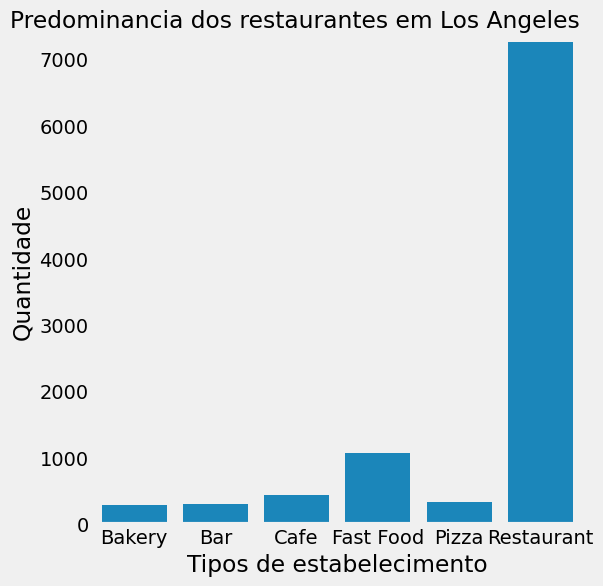

In [59]:
#criando o gráfico
plt.style.use('fivethirtyeight')
g = sns.catplot(data=data, x='object_type', kind='count', height=6)

#nomeando o gráfico
g.set_axis_labels("Tipos de estabelecimento", "Quantidade")
g.fig.suptitle("Predominancia dos restaurantes em Los Angeles")

#retirar o gride do gráfico
for ax in g.axes.flat:
    ax.grid(False)

#apresentar gráfico
plt.show()

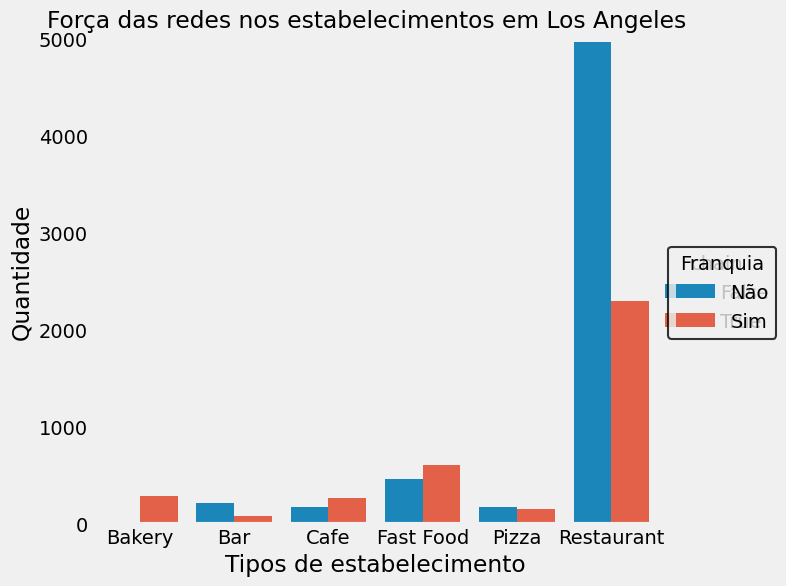

In [60]:
#criando o gráfico
plt.style.use('fivethirtyeight')
g = sns.catplot(data=data, x='object_type', kind='count', height=6, hue='chain')

#nomeando o gráfico
g.set_axis_labels("Tipos de estabelecimento", "Quantidade")
g.fig.suptitle("Força das redes nos estabelecimentos em Los Angeles")

#retirar o gride do gráfico
for ax in g.axes.flat:
    ax.grid(False)

#legenda
g.add_legend(title='Franquia')                      #adiciona a legenda com o título franquia
legend = g.legend                                   #obtem a legenda do gráfico 
legend.set_title('Franquia')                        #define o titulo da legenda
legend.set_frame_on(True)                           #adiciona uma bora à legenda
legend.get_frame().set_edgecolor('black')           #define a cor da borda da legenda
legend.get_frame().set_linewidth(1.5)               #define a largura da borda da legenda

#ajustando o rótulo da legenda
for text in legend.get_texts():
    if text.get_text() == 'False':
        text.set_text('Não')
    elif text.get_text() == 'True':
        text.set_text('Sim')
        
#apresentar gráfico
plt.show()

Pode-se notar que no ramo de Bakery as franquias tem total controle do mercado. Os mercados de Fast Food e Café tambem tem forte impacto das franquias.

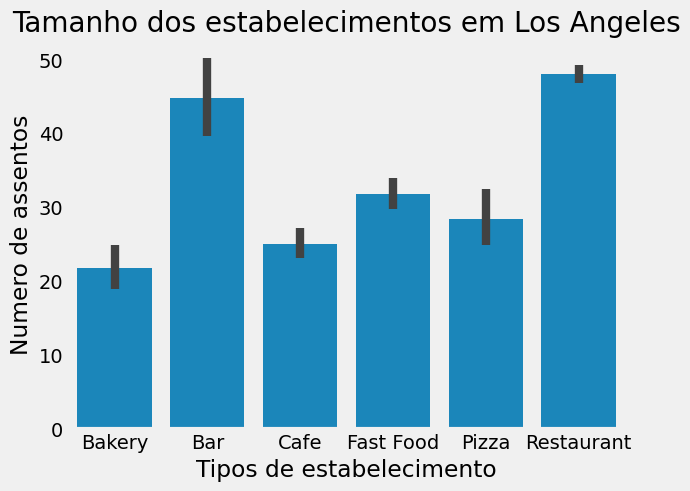

In [61]:
plt.style.use('fivethirtyeight')

ax = sns.barplot(x='object_type', y='number', data=data)

#nomeando o gráfico
ax.set_xlabel("Tipos de estabelecimento")
ax.set_ylabel("Numero de assentos")
ax.set_title("Tamanho dos estabelecimentos em Los Angeles")

#retirar o gride do gráfico
ax.grid(False)

Bares e Restaurantes contem o maior numero de assentos

In [62]:
#criando funcao que removera o numero do endereço
def remove_num(text):
    words = text.split()
    return " ".join(words[1:])

#aplicando a funcao no df e criando a coluna com os nomes das ruas
data['street'] = data['address'].apply(remove_num)


#criando o Series com as ruas com maior numero de estabelecimentos
best_street_to_eat = data['street'].value_counts().head(10)

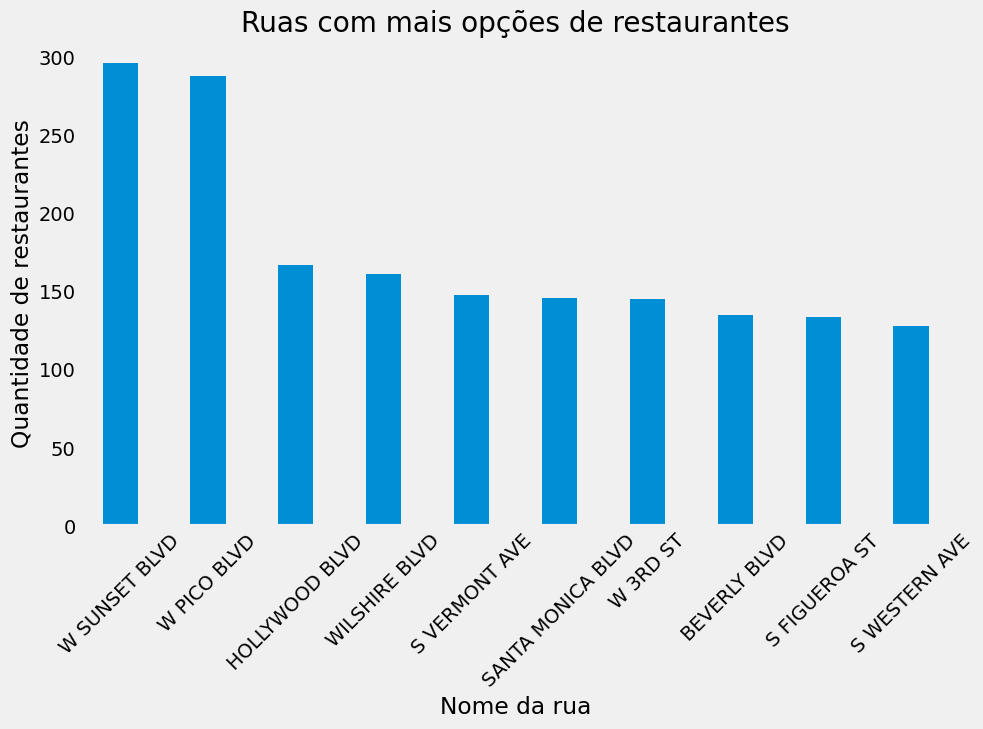

In [63]:


#plotando
fig,ax = plt.subplots(figsize=(10,6))
ax = best_street_to_eat.plot(kind='bar', width=0.4, ax=ax)

#adicionando titulo e rótulos
ax.set_title('Ruas com mais opções de restaurantes')
ax.set_xlabel("Nome da rua")
ax.set_ylabel("Quantidade de restaurantes")

#retirando o gride
ax.grid(False)
#rotacionando o eixo x
plt.xticks(rotation=45)
#apresentando
plt.show()

In [64]:
#criando lista dos lugares com apenas um unico estabelecimento
one_place_to_eat = data['street'].value_counts()

print(one_place_to_eat[one_place_to_eat<2])

street
W 6TH ST STE #223         1
S WESTERN AVE STE 112     1
E 12TH ST STE #409        1
MAPLE AVE 6               1
W PICO BLVD #2            1
                         ..
W 6TH ST STE 104-5        1
WORLD WAY #4708           1
POMONA BLVD 101           1
WILSHIRE BLVD STE #1      1
S SAN PEDRO ST STE 111    1
Name: count, Length: 2445, dtype: int64


In [65]:
#criar uma lista das ruas com mais estabelecimentos para filtragem
streets = best_street_to_eat.index
print(streets)

Index(['W SUNSET BLVD', 'W PICO BLVD', 'HOLLYWOOD BLVD', 'WILSHIRE BLVD',
       'S VERMONT AVE', 'SANTA MONICA BLVD', 'W 3RD ST', 'BEVERLY BLVD',
       'S FIGUEROA ST', 'S WESTERN AVE'],
      dtype='object', name='street')


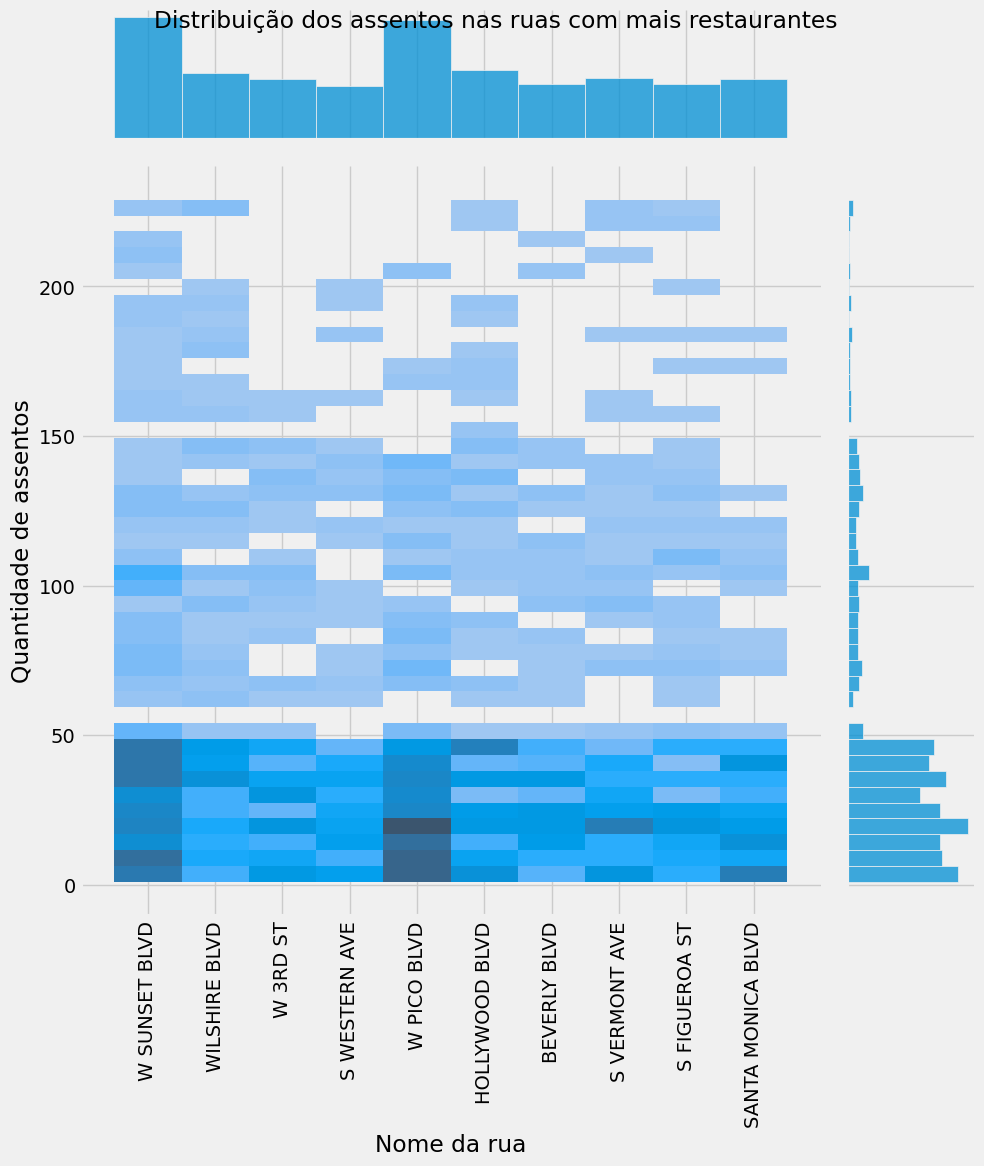

In [66]:
#filtrar restaurantes nas ruas com mais restaurantes
data_filtered = data[data['street'].isin(streets)]

#contruir gráfico

ax = sns.jointplot(x='street', y='number', data=data_filtered, kind='hist', height=10)

#nomear titulo e eixos
ax.set_axis_labels("Nome da rua", "Quantidade de assentos")
ax.fig.suptitle("Distribuição dos assentos nas ruas com mais restaurantes")

#rotacionar o eixo x
plt.xticks(rotation=90)

#apresentar o gráfico
plt.show()

As ruas W SUNSET BLVD e W PICO BLVD são as ruas com maior numero de assentos totais, podemos perceber que a maior parte dos restaurantes tem até 50 assentos. Visualmente conseguimos identificar que a rua W SUNSET BLVD tem mais cafes, e eles em um pouco menos que 50 assentos.

## <span style="color: red;">Analisando os dados das redes de café</span>

In [67]:
cafe = data[data['object_type']=='Cafe'].reset_index(drop=True)
cafe

,id,object_name,address,chain,object_type,number,street
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11839,PRIME GRIND COFFEE,714 W 1ST ST,False,Cafe,4,W 1ST ST
2,11888,CIVIL COFFEE,5629 N FIGUEROA ST,False,Cafe,17,N FIGUEROA ST
3,11907,ANTIGUA CULTURAL COFFEE,3400 N FIGUEROA ST,False,Cafe,24,N FIGUEROA ST
4,11909,MARIE'S COFFEE AND DELI,731 W 7TH ST,True,Cafe,36,W 7TH ST
...,...,...,...,...,...,...,...
430,21384,GOOD PEOPLE COFFEE CO,11609 SANTA MONICA BLVD,False,Cafe,2,SANTA MONICA BLVD
431,21396,TERRAZA CAFE COFFEE SHOP,4017 1/2 CITY TERRACE DR,False,Cafe,1,1/2 CITY TERRACE DR
432,21409,310 COFFEE COMPANY,11623 WASHINGTON PL,False,Cafe,12,WASHINGTON PL
433,21421,THE TEA & COFFEE EXCHANGE,6801 HOLLYWOOD BLVD 120,False,Cafe,4,HOLLYWOOD BLVD 120


In [68]:
from plotly import graph_objects as go

labels = ['Franqueado', 'Autônomo']
values = [cafe['chain'].sum(), cafe['chain'].count()-cafe['chain'].sum()]


fig = go.Figure(data=[go.Pie(
    labels=labels, 
    values=values, 
    textinfo='percent+label',
        marker=dict(
        colors=['#ff9999','#66b3ff'],  # Personalizando as cores
        line=dict(color='#000000', width=2)  # Adicionando uma borda preta
    )
    )])

fig.update_layout(
    title_text='Importância das Redes Franqueadas no Ramo dos Cafés',
    showlegend=True  # Exibindo a legenda
)
fig.show()


Podemos ver a aceitação de que as franquias tem no ramo de cafés, portanto existe potêncial na nossa empresa de conseguir criar uma franquia. 

In [76]:
#filtrando ruas com mais de um café
filtered_cafe = cafe['street'].value_counts()[cafe['street'].value_counts()>3].reset_index()
filtered_cafe = filtered_cafe.head(10)
filtered_cafe

,street,count
0,W SUNSET BLVD,21
1,W PICO BLVD,11
2,WORLD WAY,10
3,SANTA MONICA BLVD,8
4,WESTWOOD BLVD,7
5,HOLLYWOOD BLVD,7
6,BEVERLY BLVD,6
7,S GRAND AVE,6
8,S FIGUEROA ST,5
9,W 6TH ST,5


In [73]:
best_street_to_eat

street
W SUNSET BLVD        296
W PICO BLVD          288
HOLLYWOOD BLVD       167
WILSHIRE BLVD        161
S VERMONT AVE        148
SANTA MONICA BLVD    146
W 3RD ST             145
BEVERLY BLVD         135
S FIGUEROA ST        134
S WESTERN AVE        128
Name: count, dtype: int64

A rua "W SUNSET BLVD" é a rua com mais cafés, e com folga.
Ela também é a rua com mais estabelecimentos.
Isso significa que é a rua com mais movimento de pessoas, um café que serve com o uso de robôs e que consegue servir mais rápido se destaca num ambiente mais competitivo como esse, se tornando o lugar mais atrativo para a nossa empresa.

In [82]:
#filtrando os dados apenas da rua escolhida
cafe_filtered = cafe[cafe['street']=='W SUNSET BLVD'].reset_index(drop=True)
cafe_filtered

,id,object_name,address,chain,object_type,number,street
0,11941,MILLIE'S COFFEE SHOP,3524 W SUNSET BLVD,False,Cafe,22,W SUNSET BLVD
1,11942,ANDANTE COFFEE ROASTERS,2201 W SUNSET BLVD,True,Cafe,4,W SUNSET BLVD
2,13830,STARBUCKS COFFEE #5402,7057 W SUNSET BLVD,True,Cafe,18,W SUNSET BLVD
3,15846,THE COFFEE BEAN & TEA LEAF,6255 W SUNSET BLVD,True,Cafe,36,W SUNSET BLVD
4,15868,STARBUCKS COFFEE #5461,6102 W SUNSET BLVD,True,Cafe,28,W SUNSET BLVD
5,15933,SUNSET JUNCTION COFFEE SHOP,3916 W SUNSET BLVD,False,Cafe,37,W SUNSET BLVD
6,15945,VONS MARKET #2665,4520 W SUNSET BLVD,True,Cafe,3,W SUNSET BLVD
7,16033,JAVISTA ORGANIC COFFEE BAR,6707 W SUNSET BLVD,False,Cafe,5,W SUNSET BLVD
8,16381,INTELLIGENTSIA COFFEE,3922 W SUNSET BLVD,False,Cafe,40,W SUNSET BLVD
9,16479,STARBUCKS COFFEE #5379,5545 W SUNSET BLVD,True,Cafe,17,W SUNSET BLVD


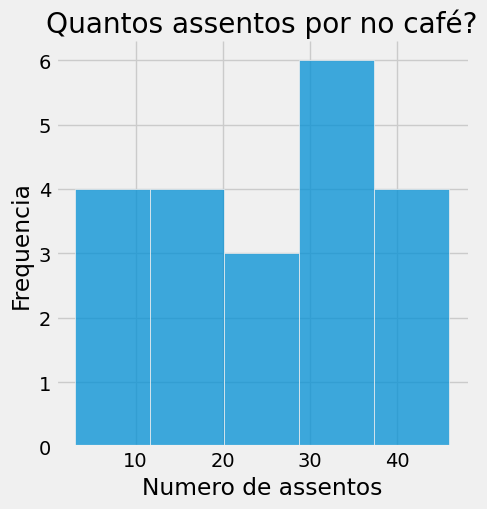

O numero máximo de assentos nas cafeterias dessa rua é de: 46


In [93]:
sns.displot(cafe_filtered['number'], bins=5)
plt.title("Quantos assentos por no café?")
plt.xlabel("Numero de assentos")
plt.ylabel("Frequencia")
plt.show()

print("O numero máximo de assentos nas cafeterias dessa rua é de:",cafe_filtered['number'].max())

É possivel notar que nao axistem cafés com mais de 50 assentos. E também que a distribuição deles é bastante homogênea